ValueError: not enough values to unpack (expected 3, got 2)

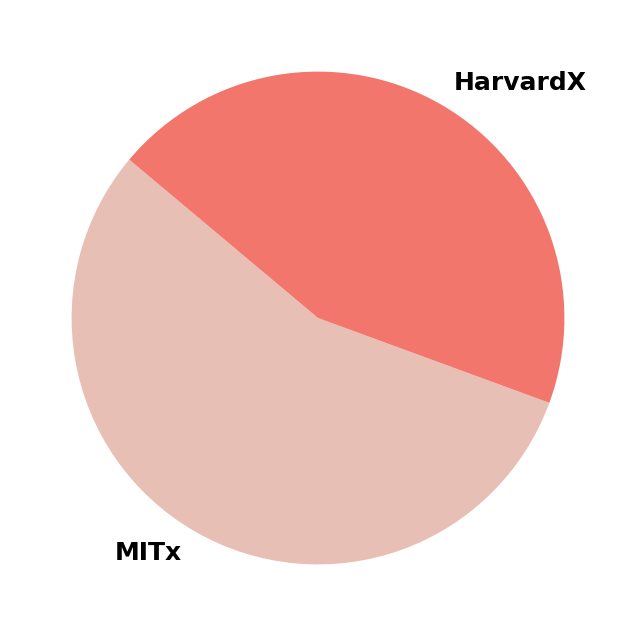

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Načtení dat z tabulky "kurzy_cleaned.csv"
data = pd.read_csv("kurzy_cleaned.csv")

# Data pro pie chart (shrnutí)
institutions = ["MITx", "HarvardX"]
courses_offered = [data[data["Institution"] == "MITx"].shape[0], 
                   data[data["Institution"] == "HarvardX"].shape[0]]
colors = ['#e8bfb5', '#F2766B']  # Purple and yellow

# Custom autopct function to make the largest percentage white
def custom_autopct(pct, total):
    absolute = int(round(pct * total / 100.0))
    return f'{pct:.1f}%' if absolute != max(courses_offered) else f'{pct:.1f}%'

# Vytvoření pie chartu
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    courses_offered,
    labels=institutions,
    autopct=lambda pct: custom_autopct(pct, sum(courses_offered)),
    startangle=140,
    colors=colors,
    textprops={'fontsize': 18, 'fontweight': 'bold'}
)

# Přizpůsobení barvy největšího procenta na bílou
for i, autotext in enumerate(autotexts):
    if courses_offered[i] == max(courses_offered):
        autotext.set_color("black")
    else:
        autotext.set_color("black")

# Nastavení tučnějších a větších popisků
for text in texts:
    text.set_fontsize(18)
    text.set_fontweight('bold')

# Přidání nadpisu s větším paddingem
plt.title("Proportion of Courses Offered by Institutions", fontsize=24, fontweight='bold', pad=10)

# Zajištění, že pie chart bude kruhový
plt.axis('equal')

# Zobrazení grafu
plt.show()



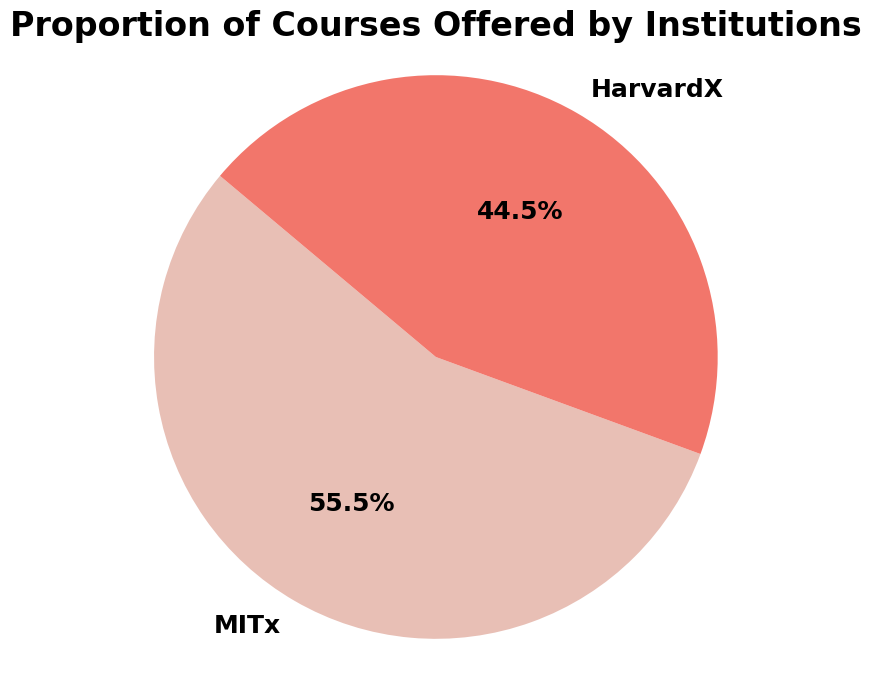

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Načtení dat z tabulky "kurzy_cleaned.csv"
data = pd.read_csv("kurzy_cleaned.csv")

# Data pro pie chart
institutions = ["MITx", "HarvardX"]
courses_offered = [
    data[data["Institution"] == institution].shape[0] 
    for institution in institutions
]
colors = ['#e8bfb5', '#F2766B']  # Barvy

# Vytvoření pie chartu
plt.figure(figsize=(8, 8))
plt.pie(
    courses_offered,
    labels=institutions,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 18, 'fontweight': 'bold', 'color': 'black'}
)

# Nastavení nadpisu
plt.title("Proportion of Courses Offered by Institutions", fontsize=24, fontweight='bold', pad=10)

# Zajištění kruhového tvaru
plt.axis('equal')

# Zobrazení grafu
plt.show()
